#Anvesha Raikwar
## 21070126017
##AIML A1

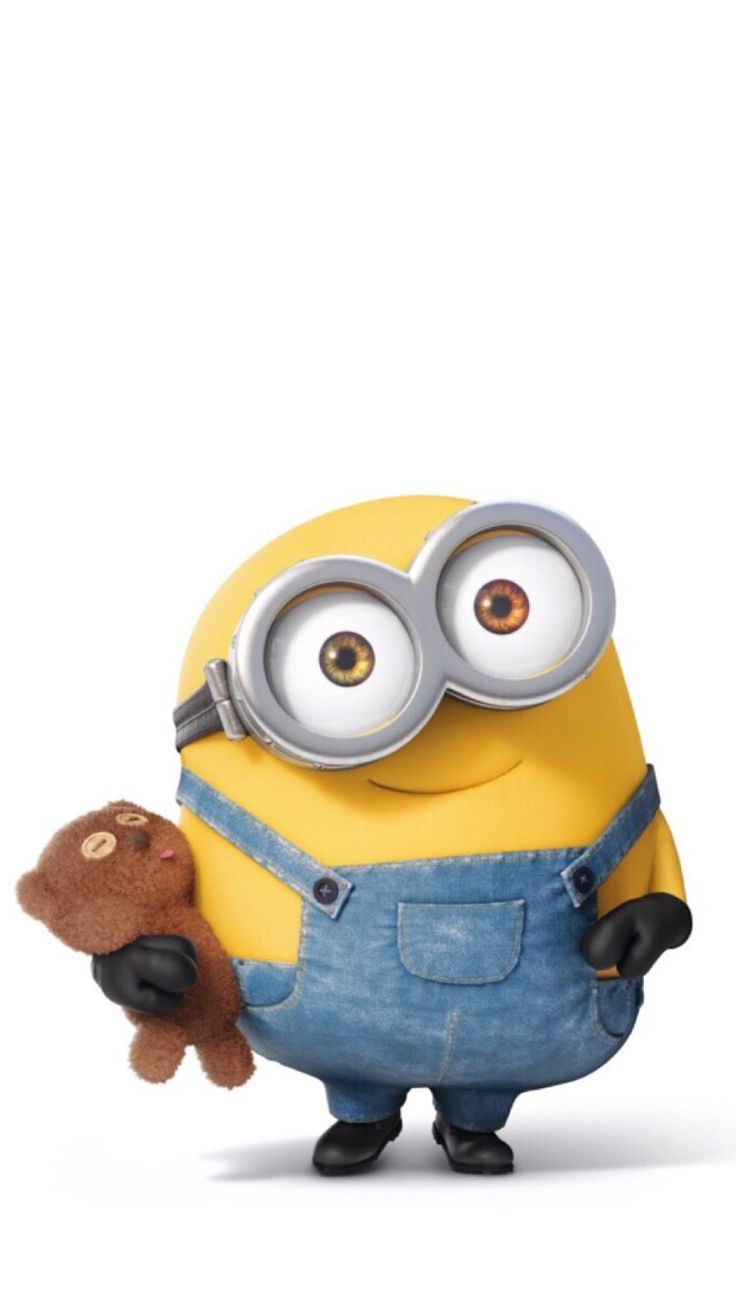

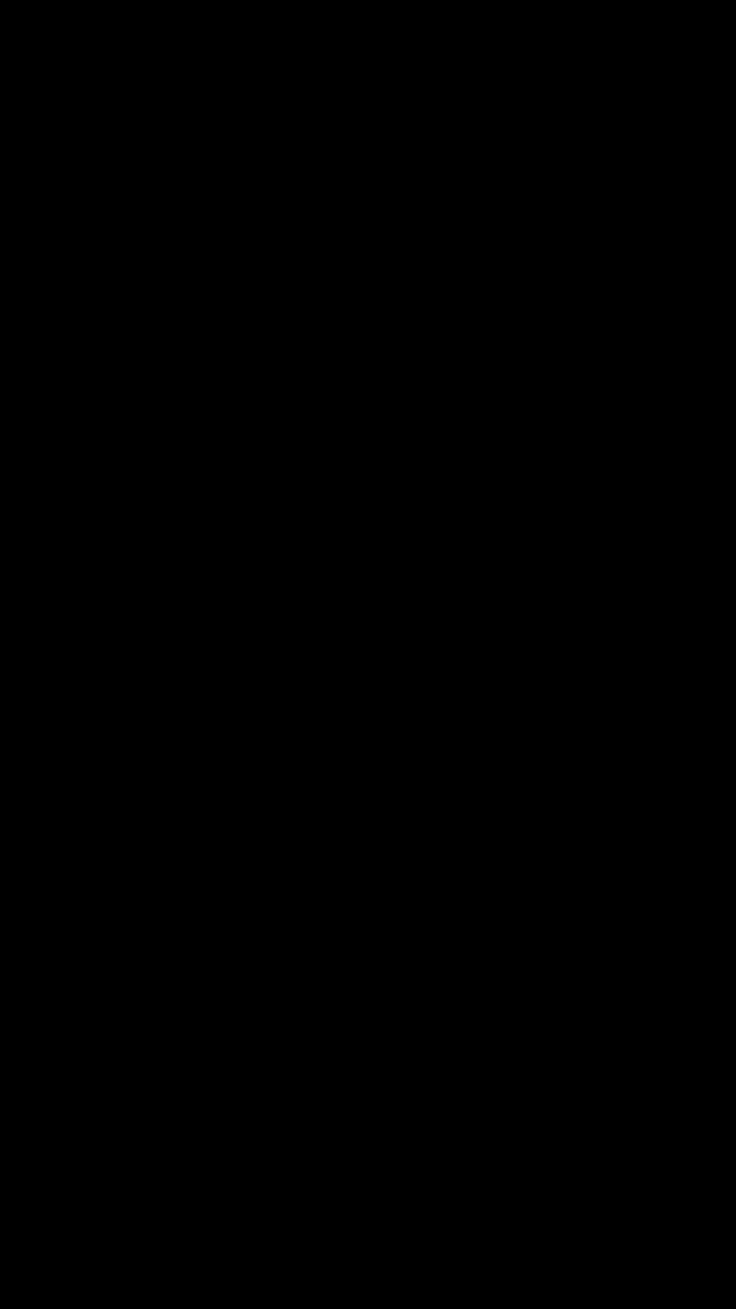

In [3]:
#importing necessary libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

#reading the damaged image
damaged_img = cv2.imread(filename="/content/c6de4fbc92c32c25dd90c41884968d63.jpg")

#displaying the damaged image
cv2_imshow(damaged_img)

#getting the shape of the image
height, width = damaged_img.shape[0], damaged_img.shape[1]

#converting all pixels greater than zero to black while black becomes white
for i in range(height):
    for j in range(width):
        if damaged_img[i, j].sum() > 0:
            damaged_img[i, j] = 0
        else:
            damaged_img[i, j] = [255, 255, 255]

#saving the mask
mask = damaged_img
cv2.imwrite('/content/c6de4fbc92c32c25dd90c41884968d63.jpg', mask)

#displaying mask
cv2_imshow(mask)

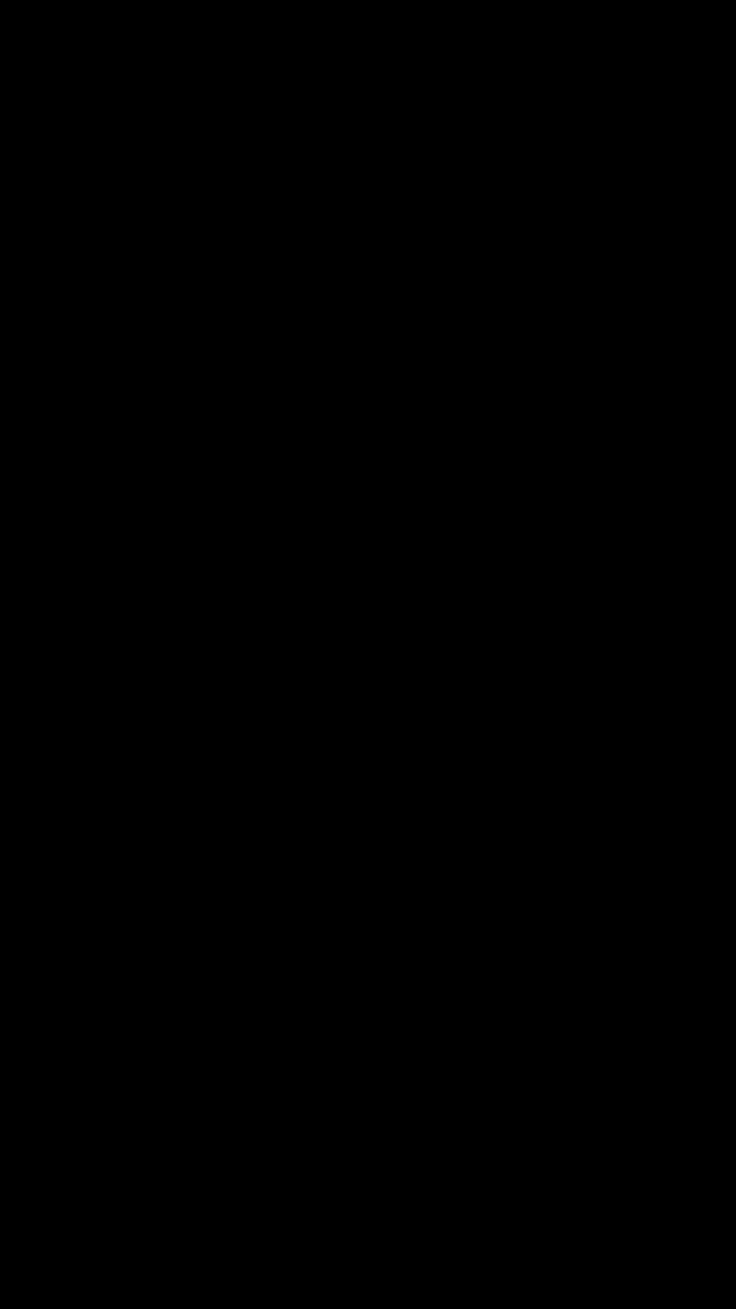

In [4]:
#opening the image
img = cv2.imread('/content/c6de4fbc92c32c25dd90c41884968d63.jpg')

#loading the mask
mask = cv2.imread('/content/c6de4fbc92c32c25dd90c41884968d63.jpg', 0)

#inpainting the damaged image
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

#writing the output
cv2.imwrite('/content/c6de4fbc92c32c25dd90c41884968d63.jpg', dst)

#displaying inpainted image
cv2_imshow(dst)

In [5]:
import cv2
import numpy as np

def inpaint_image(image, mask, patch_size=9):
    # Create a copy of the image
    inpainted_image = image.copy()

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate over contours and inpaint each region
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        region = mask[y:y+h, x:x+w]
        region_image = image[y:y+h, x:x+w]

        # Get the mean color of the surrounding region
        mean_color = cv2.mean(region_image, mask=region)[0:3]

        # Inpaint the region using spatial patch blending
        inpainted_region = cv2.inpaint(region_image, region, patch_size, cv2.INPAINT_TELEA)

        # Replace the inpainted region in the image
        inpainted_image[y:y+h, x:x+w] = inpainted_region

    return inpainted_image

if __name__ == "__main__":
    # Load the damaged image and corresponding mask
    damaged_image = cv2.imread("/content/KOA_Nassau_2697x1517.jpg")
    mask = cv2.imread("/content/KOA_Nassau_2697x1517.jpg", 0)  # 0 indicates grayscale

    # Perform inpainting using spatial patch blending
    inpainted_image = inpaint_image(damaged_image, mask)

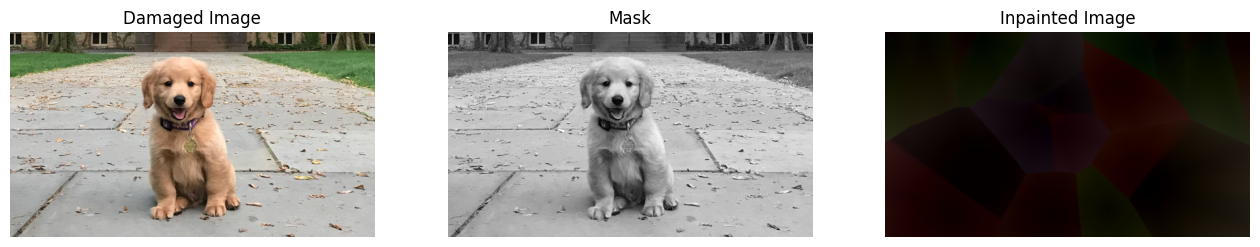

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot the original damaged image
axes[0].imshow(cv2.cvtColor(damaged_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Damaged Image')
axes[0].axis('off')

# Plot the mask
axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

# Plot the inpainted image
axes[2].imshow(cv2.cvtColor(inpainted_image, cv2.COLOR_BGR2RGB))
axes[2].set_title('Inpainted Image')
axes[2].axis('off')

# Show the plot
plt.show()